In [1]:
import findspark
findspark.init()

import pyspark

In [2]:
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession

sc = SparkContext()
spark = SparkSession(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/10 19:15:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
data = spark.read.csv("Fifa2018_dataset.csv", header=True,
                      inferSchema=True)

In [4]:
num_rows = data.count()
num_columns = len(data.columns)
print(f"Shape: ({num_rows}, {num_columns})")

Shape: (17981, 75)


In [5]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [6]:
for row in data.head(2):
    print(row)
    print('\n')
data.show(3)

Row(_c0=0, Name='Cristiano Ronaldo', Age=32, Photo='https://cdn.sofifa.org/48/18/players/20801.png', Nationality='Portugal', Flag='https://cdn.sofifa.org/flags/38.png', Overall=94, Potential=94, Club='Real Madrid CF', Club Logo='https://cdn.sofifa.org/24/18/teams/243.png', Value='€95.5M', Wage='€565K', Special=2228, Acceleration='89', Aggression='63', Agility='89', Balance='63', Ball control='93', Composure='95', Crossing='85', Curve='81', Dribbling='91', Finishing='94', Free kick accuracy='76', GK diving='7', GK handling='11', GK kicking='15', GK positioning='14', GK reflexes='11', Heading accuracy='88', Interceptions='29', Jumping='95', Long passing='77', Long shots='92', Marking='22', Penalties='85', Positioning='95', Reactions='96', Short passing='83', Shot power='94', Sliding tackle='23', Sprint speed='91', Stamina='92', Standing tackle='31', Strength='80', Vision='85', Volleys='88', CAM=89.0, CB=53.0, CDM=62.0, CF=91.0, CM=82.0, ID=20801, LAM=89.0, LB=61.0, LCB=53.0, LCM=82.0, LD

25/07/10 19:15:43 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
25/07/10 19:15:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Acceleration, Aggression, Agility, Balance, Ball control, Composure, Crossing, Curve, Dribbling, Finishing, Free kick accuracy, GK diving, GK handling, GK kicking, GK positioning, GK reflexes, Heading accuracy, Interceptions, Jumping, Long passing, Long shots, Marking, Penalties, Positioning, Reactions, Short passing, Shot power, Sliding tackle, Sprint speed, Stamina, Standing tackle, Strength, Vision, Volleys, CAM, CB, CDM, CF, CM, ID, LAM, LB, LCB, LCM, LDM, LF, LM, LS, LW, LWB, Preferred Positions, RAM, RB, RCB, RCM, RDM, RF, RM, RS, RW, RWB, ST
 Schema: _c0, Name, Age, Photo, Nationality, Flag, Overall, Poten

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

25/07/10 19:15:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Acceleration, Aggression, Agility, Balance, Ball control, Composure, Crossing, Curve, Dribbling, Finishing, Free kick accuracy, GK diving, GK handling, GK kicking, GK positioning, GK reflexes, Heading accuracy, Interceptions, Jumping, Long passing, Long shots, Marking, Penalties, Positioning, Reactions, Short passing, Shot power, Sliding tackle, Sprint speed, Stamina, Standing tackle, Strength, Vision, Volleys, CAM, CB, CDM, CF, CM, ID, LAM, LB, LCB, LCM, LDM, LF, LM, LS, LW, LWB, Preferred Positions, RAM, RB, RCB, RCM, RDM, RF, RM, RS, RW, RWB, ST
 Schema: _c0, Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Acceleration, Aggression, Agility, Balance, Ball control, Composure, Crossing, Curve, Dribbling, Finishing, Free kick accuracy, GK diving, GK ha

In [7]:
print("There are {} rows in the fifa DataFrame.".format(data.count()))

There are 17981 rows in the fifa DataFrame.


In [8]:
data.createOrReplaceTempView("fifa_table")

In [9]:
query = '''SELECT Age FROM fifa_table WHERE Nationality == "Germany"'''
fifa_germany_age = spark.sql(query)
fifa_germany_age.show(3)

+---+
|Age|
+---+
| 31|
| 27|
| 28|
+---+
only showing top 3 rows



In [10]:
# generate basic statistics
fifa_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



In [11]:
fifa_germany_age_pandas = fifa_germany_age.toPandas()

In [12]:
import matplotlib.pyplot as plt

<Axes: ylabel='Density'>

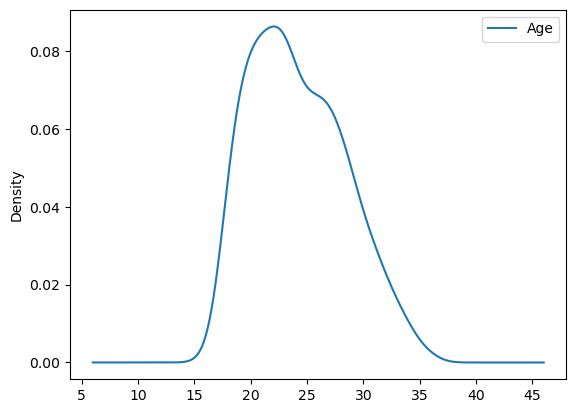

In [13]:
fifa_germany_age_pandas.plot(kind='density')

In [14]:
data.groupBy("Age").count().show()

+---+-----+
|Age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
| 25| 1522|
| 24| 1334|
| 29| 1121|
+---+-----+
only showing top 20 rows



In [15]:
data.groupBy("Nationality").avg("Age").show()

+--------------------+------------------+
|         Nationality|          avg(Age)|
+--------------------+------------------+
|                Chad|              25.0|
|              Russia| 25.23202614379085|
|            Paraguay| 26.10144927536232|
|             Senegal|25.046511627906977|
|              Sweden|25.119565217391305|
|             Eritrea|              32.0|
|         Philippines|25.666666666666668|
|                Fiji|              29.0|
|              Turkey|25.127147766323024|
|                Iraq|              26.0|
|             Germany| 24.20263157894737|
|      St Kitts Nevis|26.666666666666668|
|             Comoros| 27.11111111111111|
|         Ivory Coast| 24.10891089108911|
|              France|24.634969325153374|
|              Greece|24.418367346938776|
|              Kosovo|           23.9375|
|Central African Rep.|             26.75|
|            DR Congo| 24.75862068965517|
|          Montserrat|              24.5|
+--------------------+------------

In [16]:
from pyspark.sql import functions as F
data.groupBy("Nationality").agg(F.min("Age"),
                                F.max("Age"),
                                F.min("Strength"),
                                F.max("Strength")).show()

+------------------+--------+--------+-------------+-------------+
|       Nationality|min(Age)|max(Age)|min(Strength)|max(Strength)|
+------------------+--------+--------+-------------+-------------+
|       Afghanistan|      19|      27|           40|           58|
|           Albania|      18|      33|           32|           79|
|           Algeria|      17|      34|           39|           90|
|            Angola|      20|      34|           56|           87|
| Antigua & Barbuda|      20|      26|           47|           67|
|         Argentina|      16|      39|           28|           92|
|           Armenia|      18|      32|           49|           75|
|         Australia|      17|      37|           28|           90|
|           Austria|      17|      36|           20|           93|
|        Azerbaijan|      18|      31|           64|           84|
|          Barbados|      30|      30|           71|           71|
|           Belarus|      27|      36|           43|          

In [17]:
data.select("Club").distinct().show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
|       SC Heerenveen|
+--------------------+
only showing top 20 rows



In [18]:
fifa_clubs = spark.sql('''SELECT DISTINCT Club FROM fifa_table''')
fifa_clubs.show()

+--------------------+
|                Club|
+--------------------+
|             Palermo|
|         Yeovil Town|
|  1. FC Union Berlin|
|  Santiago Wanderers|
|               Carpi|
|Evkur Yeni Malaty...|
|          Sagan Tosu|
|            FC Basel|
|  Argentinos Juniors|
|       Karlsruher SC|
|  Lorca Deportiva CF|
|     SC Paderborn 07|
|San Lorenzo de Al...|
|         SC Freiburg|
|  SpVgg Unterhaching|
|Atletico Nacional...|
|Universidad Católica|
|         GFC Ajaccio|
|           FC Luzern|
|       SC Heerenveen|
+--------------------+
only showing top 20 rows



In [19]:
data_desc = data.orderBy(data["Age"].desc())

In [20]:
data_desc.select("Name", "Age", "Strength").show(3)

+-------------+---+--------+
|         Name|Age|Strength|
+-------------+---+--------+
|B. Richardson| 47|      47|
| E. El Hadary| 44|      73|
|     O. Pérez| 44|      66|
+-------------+---+--------+
only showing top 3 rows



In [21]:
people_with_Cristiano = data.where(data["Name"].contains("Cristiano"))
people_with_Cristiano.count()

3

In [22]:
people_with_Cristiano.select("Name").show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+



In [23]:
people_with_Cristiano_2 = spark.sql('''SELECT * FROM fifa_table WHERE Name like "%Cristiano%"''')
people_with_Cristiano_2.count()

3

In [24]:
people_with_Cristiano_2.select("Name").show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+



25/07/10 19:15:52 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
